In [3]:
import pandas as pd

pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列

algorithmic_evaluate_csv_path = 'algorithmic_evaluate.csv'
algorithmic_df = pd.read_csv(algorithmic_evaluate_csv_path)
algorithmic_df = algorithmic_df[algorithmic_df['ARG'] <= 100000]    
algorithmic_grouped_df = algorithmic_df.groupby(['method'], as_index=False).mean()

noisy_evaluate_csv_path = 'noisy_evaluate.csv'
noisy_df = pd.read_csv(noisy_evaluate_csv_path)
noisy_grouped_df = noisy_df.groupby(['method'], as_index=False).mean()

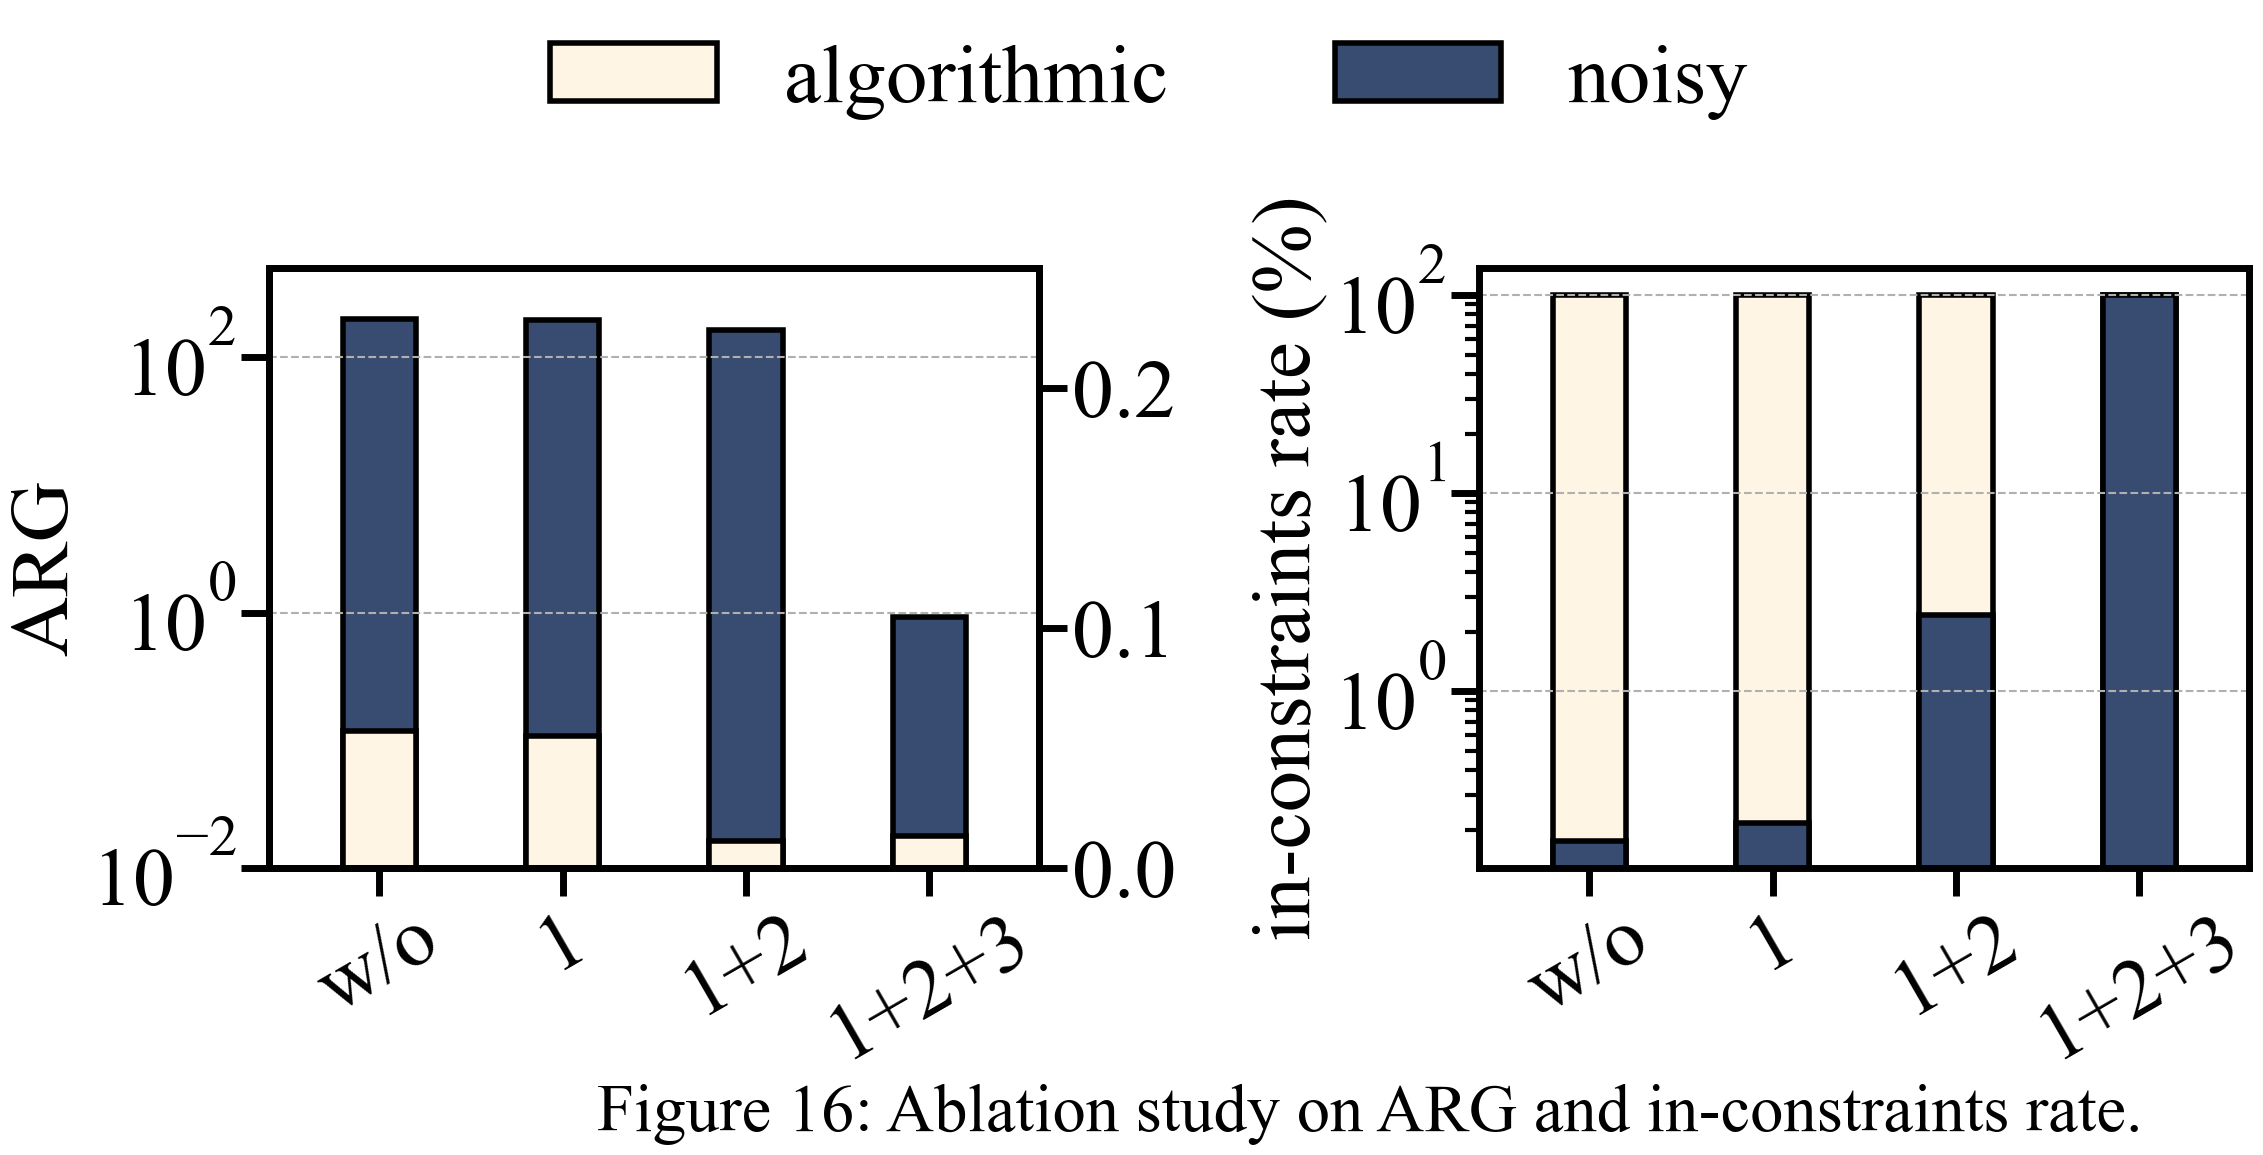

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# 图形风格设置
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    'lines.markersize': 35,
    'lines.markeredgewidth': 4,
    'markers.fillstyle': 'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})

# 设置方法和对应标签
methods = ['[0, 0, 0, 0]', '[1, 0, 0, 0]', '[1, 1, 0, 0]', '[1, 1, 1, 1]']
x_labels = ['w/o', '1', '1+2', '1+2+3']
x = np.arange(len(methods))
bar_width = 0.4

# 颜色
color_algo = '#FFF5E4'
color_classical = '#384B70'
edge_color = 'black'

# 错误棒参数
error_params = dict(elinewidth=3, ecolor='black', capsize=8, capthick=2)

# 图形创建
scale = 1
fig = plt.figure(figsize=(22 * scale, 12 * scale))
ax1 = plt.axes((0, 0, 0.35, 0.5))
ax1_1 = ax1.twinx()
ax2 = plt.axes((0.55, 0, 0.35, 0.5))

# 左图：ARG
for i, method in enumerate(methods):
    data_algo = algorithmic_grouped_df[algorithmic_grouped_df.method == method]
    data_noisy = noisy_grouped_df[noisy_grouped_df.method == method]

    ax1.bar(
        x[i],
        data_noisy['ARG'].values[0],
        width=bar_width,
        color=color_classical,
        edgecolor=edge_color,
        label='noisy' if i == 0 else "",
        error_kw=error_params,
        linewidth=4
    )

    ax1_1.bar(
        x[i],
        data_algo['ARG'].values[0],
        width=bar_width,
        color=color_algo,
        edgecolor=edge_color,
        label='algorithmic' if i == 0 else "",
        error_kw=error_params,
        linewidth=4
    )


ax1.set_ylabel('ARG')
ax1.set_yscale('log')
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=30)
ax1.set_xlim(-0.6, len(x) - 0.4)
ax1.grid(True, linestyle='--', linewidth=1.5, axis='y')
ax1.set_ylim(0.01, 500)
ax1_1.set_ylim(0, 0.25)

# 右图：In-Constraints Rate
for i, method in enumerate(methods):
    data_algo = algorithmic_grouped_df[algorithmic_grouped_df.method == method]
    data_noisy = noisy_grouped_df[noisy_grouped_df.method == method]

    ax2.bar(
        x[i],
        data_algo['in_constraints_probs'].values[0],
        width=bar_width,
        color=color_algo,
        edgecolor=edge_color,
        label='algorithmic' if i == 0 else "",
        error_kw=error_params,
        linewidth=4
    )

    ax2.bar(
        x[i],
        data_noisy['in_constraints_probs'].values[0],
        width=bar_width,
        color=color_classical,
        edgecolor=edge_color,
        label='noisy' if i == 0 else "",
        error_kw=error_params,
        linewidth=4
    )

ax2.set_ylabel('in-constraints rate (%)')
# ax2.set_ylim(0, 105)
ax2.set_xticks(x)
ax2.set_xticklabels(x_labels, rotation=30)
ax2.set_xlim(-0.6, len(x) - 0.4)
ax2.grid(True, linestyle='--', linewidth=1.5, axis='y')
ax2.set_yscale('log')

# 图例：只画一次
handles, labels = ax2.get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc='upper center',
    ncol=2,
    frameon=False,
    bbox_to_anchor=(-0.1, 0.55, 1, 0.2),

)

title = "Figure 16: Ablation study on ARG and in-constraints rate"
plt.suptitle(title, y=-0.18, fontsize=48)
plt.savefig(f'{title}.svg', bbox_inches='tight')
plt.show()